In [1]:
import importlib.util
if importlib.util.find_spec('empylib') is None:
    !pip install git+https://github.com/PanxoPanza/empylib.git

# Propiedades ópticas de los materiales

## Fundamentos del movimiento oscilatorio

### Frecuencia natural de un sistema vibratorio

Analicemos el caso simplificado de un sistema masa resorte

<img src="./images/free_sistem_one_degree.png" width="400px" align= center>

donde, $k$ es la constante de rigidez del resorte, y $m$ es la masa.

El resorte ejerce una **fuerza de restauración**, $F_\mathrm{res} = kx$, que actúa en sentido contrario al desplazamiento de la masa.

<img src="./images/dcl_mass-spring.png" width="400px" align= center>

Mediante un equilibrio de fuerzas, concluimos que la ecuación gobernante es:

\begin{equation*}
\ddot{x} + \omega_n^2 x = 0 
\end{equation*}

donde **$\omega_n = \sqrt{k/m}$, es la frecuencia natural del sistema**

**La frecuencia natural** de un sistema vibratorio **representa la frecuencia de oscilación del sistema en ausencia de amortiguación y fuerzas externas**.

Es una firma espectral que **solo se puede cambiar ajustando la masa $m$ o la constante de rigidez del sistema $k$.**

Esto significa que, **ante cualquier perturbación del sistema en equilibrio, el sistema oscilará en su frecuencia natural $\omega_n$.**

<img src="./images/1dof-1spring.gif" width="300px" align= center></img>
<center> <small>Sistema con 1 grado de libertad (Fuente: <a href="https://www.acs.psu.edu/drussell/demos.html">Daniel A. Russell)</a></small></center>

Cada sistema tiene una frecuencia natural, que puede estar definida por distintos parámetros. Sin embargo, **la característica más importante, es la presencia de una fuerza de restauración opuesta al movimiento del cuerpo.**

Por ejemplo, en un péndulo, la fuerza de restauración corresponde a la componente de la fuerza de gravedad que actúa en sentido contrario a la aceleración del cuerpo.

<img src="./images/pendulum_forces.gif" width="400px" align= center>

### Vibración forzada amortiguada con un grado de libertad
La frecuencia natural cobra relevancia cuando analizamos vibraciones forzadas.

Consideremos, por ejemplo, un sistema masa-resorte amortiguado, donde $c$ es la constante de amortiguación. El sistema es excitado por una fuerza externa oscilatoria de la forma $F(t) = F_0 e^{i\omega t}$, donde $F_0$ es una constante. 

<img src="./images/forced_damped_system.png" width="400px" align= center>

La ecuación gobernante de este sistema está dada por:

\begin{equation*}
\ddot{x} + \frac{c}{m}\dot{x} +  \omega_n^2 x = \frac{F_0}{m} e^{- i\omega t},
\end{equation*}


La solución estacionaria es de la forma $x = Ae^{-i\omega t}$:

\begin{equation*}
x(t) = - \frac{F_0/m}{\omega^2 - \omega_n^2 + i\frac{c}{m} \omega}e^{- i\omega t}
\end{equation*}

donde $A = - \frac{F_0/m}{\omega^2 - \omega_n^2 + i\frac{c}{m} \omega}$ es la amplitud de la respuesta oscilatoria.


La ecuación indica que **la amplitud de la respuesta depende principalmente, de la frecuencia de la fuerza externa $\omega$**.

Más aún, como vemos en esta herramienta interactiva de [movimiento forzado amortiguado](https://www.compadre.org/osp/EJSS/4026/134.htm?F=1), cuando $\omega \approx \omega_n$ la amplitud aumenta a un límite crítico.

<img src="./images/forced.gif" width="300px" align= center></img>
<center> <small>Respuesta ante fuerza oscilatoria  (Fuente: <a href="https://www.acs.psu.edu/drussell/demos.html">Daniel A. Russell)</a></small></center>

En este caso decimos que el **sistema está en resonancia**.

La mejor forma de visualizar este fenómeno es analizando la amplitud en función de la frecuencia de la fuerza externa $\omega$. En el gráfico a continuación mostramos el valor del módulo de la amplitud, $|A|$ (izquierda) y la parte real e imaginaria de la amplitud (derecha).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def x_amplitude(k,c):
    
    m = 1                                           # masa del cuerpo
    w = np.linspace(0,2,200)                       # rango de frecuencias
    F0 = 1                                          # Amplitud de la fuerza
    wn = np.sqrt(k/m)                               # frencuencia natural
    A  = lambda x: - F0/m/(x**2 - wn**2 + 1j*c/m*x) # amplitud de la respuesta
    
    # formateamos el lienzo para graficar
    fig, ax = plt.subplots(1,2)             # número de ejes en la figura
    fig.set_size_inches(10, 3)              # tamaño de la figura
    plt.rcParams['font.size'] = '12'        # tamaño de fuente
    
    # Ploteamos gráfico izquierdo
    ax[0].plot(w,np.absolute(A(w)),'k',label="$|A|$")     # módulo de la amplitud
    
    # marcar línea de frecuencia natural
    ax[0].axvline(x = wn, color='r', ls='--', lw='1.0')  
    ax[0].text(wn*1.01,np.absolute(A(wn)),'$\omega_n$', fontsize='12', color='r')
    
    # etiquetar valores de m y F0 en el gráfico
    x0, y0 = 0.1, 100
    ax[0].text(x0, y0,r'$m$ = %.0f kg'   % m , fontsize='10', color='k')
    ax[0].text(x0, y0*0.55,r'$F_0$ = %.0f N'% F0, fontsize='10', color='k')
    
    # Ploteamos gráfico derecho
    ax[1].plot(w,A(w).real,'b',label=r"$\mathrm{Re}(A)$") # parte real de la amplitud
    ax[1].plot(w,A(w).imag,'r',label=r"$\mathrm{Im}(A)$") # parte imaginaria de la amplitud
    
    for i in [0,1]:
        ax[i].set_xlabel('$\omega$ ')
        #ax[i].grid() 
        ax[i].set_xlim(0,2.0)
        ax[i].legend(frameon=False)
    ax[0].set_yscale('log')
    ax[0].set_ylim(0.1,200)
    ax[0].set_ylabel('Módulo de la amplitud')
    ax[1].set_ylabel('Amplitud')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

In [3]:
from ipywidgets import interact

@interact( k=(0.3,2.0,0.1), 
           c=(0.02,0.2,0.01))
def g(k=1, c=0):
    return x_amplitude(k,c)

interactive(children=(FloatSlider(value=1.0, description='k', max=2.0, min=0.3), FloatSlider(value=0.02, descr…

La frecuencia de resonancia es fundamental en el diseño de puentes, edificios, instrumentos acústicos y otras. 

Un ejemplo emblemático es el [colapso del puente Tacoma en 1940](https://es.wikipedia.org/wiki/Puente_de_Tacoma_(1940)).

<img src="./images/tacoma-narrows-bridge-shaking.gif" width="400px" align= center>

El puente se derrumbó debido al aleteo aeroelástico producido por los vientos, el cual coincidía con la frecuencia natural del puente

Otro ejemplo típico es el columpio

<img src="./images/swing_resonance.gif" width="300px" align= center>

En este caso, la fuerza externa son las piernas. La resonancia se alcanza cuando estas se mueven en sincronía con la frecuencia natural del péndulo. El efecto de amortiguación en este caso, está dado por el arrastre del viento, fricción, etc.

### Sistemas vibratorios con más de un grado de libertad

Un sistema vibratorio puede tener más de una frecuencia natural. **El número de frecuencias naturales está directamente relacionado con el número de grados de libertad del sistema**. 

**Sistema con 1 grado de libertad** (aquí la frecuencia natural cambia a $\omega_n = \sqrt{2k/m}$, debido a la presencia de 2 resortes)

|modo | $\omega_n$   |
|:---:|:------------:|
| 1   | $1.414\sqrt{k/m}$ | 

<img src="./images/1dof.gif" width="200px" align= center></img>
<center> <small>Sistema con 1 grado de libertad (Fuente: <a href="https://www.acs.psu.edu/drussell/demos.html">Daniel A. Russell)</a></small></center>

**Sistema con 2 grados de libertad**

|modo | $\omega_n$   |
|:---:|:------------:|
| 1   | $1.000\sqrt{k/m}$ |
| 2   | $1.732\sqrt{k/m}$| 

<img src="./images/2dof-mode-1.gif" width="300px" align= center></img>
<img src="./images/2dof-mode-2.gif" width="300px" align= center></img>
<center> <small>Sistema con 2 grados de libertad (Fuente: <a href="https://www.acs.psu.edu/drussell/demos.html">Daniel A. Russell)</a></small></center>

**Sistema con 3 grados de libertad**

|modo | $\omega_n$   |
|:---:|:------------:|
| 1   | $0.765\sqrt{k/m}$ |
| 2   | $1.414\sqrt{k/m}$| 
| 3   | $1.868\sqrt{k/m}$| 

<img src="./images/3dof-mode-1.gif" width="300px" align= center></img>
<img src="./images/3dof-mode-2.gif" width="300px" align= center></img>
<img src="./images/3dof-mode-3.gif" width="300px" align= center></img>
<center> <small>Sistema con 3 grados de libertad (Fuente: <a href="https://www.acs.psu.edu/drussell/demos.html">Daniel A. Russell)</a></small></center>

Notar la forma en que las frecuencias naturales se distribuye a medida que aumentamos los grados de libertad del sistema (*Las flechas rojas indican la dirección de las masas asociada a cada modo de vibración*):


<img src="./images/nat_frequency_hybrid.png" width="800px" align= center>

En este caso, para **activar la resonancia de un modo mediante una fuerza oscilatoria externa** se deben cumplir dos condiciones:

- **La frecuencia de la fuerza externa ($\omega$) debe ser igual a la frecuencia natural del modo respectivo**
- **El sentido de la fuerza debe ser compatible con el movimiento independiente de cada elemento**

## Interacción de luz gases

La interacción de luz con gases es el modelo más simple. En este caso, cada molécula representa un sistema oscilatorio

### El oscilador armónico
Consideremos la molecula de agua.

<img src="./images/water_molecule.png" width="400px" align= center>

Esta molécula está **polarizada**, es decir, posee una **carga eléctrica neta positiva en un extremo y negativa en otro**. 

Esto ocurre debido a que los electrones se mantienen, preferentemente, en la región cercana al núcleo del oxígeno.

El enlance entre el hidrógeno y oxígeno genera una fuerza de atracción, la cual es contrarestada por la repulción entre los núcleos. En forma simplificada, podemos representar este fenómeno mediante un sistema *masa-resorte*.

<img src="./images/water_molecule_spring.png" width="300px" align= center>

En otras palabras, cada enlace en la molécula de agua representa un oscilador armónico, con una fuerza de restauración:

\begin{equation*}
F = -k(r - r_0)
\end{equation*}

donde $k$ es la constante de rigidez y $r_0$ es la posición de los núcleos en equilibrio.

### Modelo de Lorentz

Consideremos ahora la interacción de una onda electromagnética con una molécula di atómica.

<img src="./images/molecule_spring_mass.png" width="300px" align= center>

El campo eléctrico de la onda EM ($E_0e^{-i\omega t}$), ejerce una fuerza $F = qE_0e^{-i\omega t}$ sobre cada polo, donde $q$ es la carga eléctrica del polo positivo (o negativo). 

Consideramos, ademas, una fuerza de amortiguación, $F_{c} = - m\Gamma \dot{x}$, que **representa la disipación de energía** por la colición entre los electrones y los nucleos, además de otras interacciónes electromagnéticas. La constante **$\Gamma$** es la **tasa de decaimiento** (se mide en unidades 1/s).



***El fenómeno, así, representa un sistema forzado amortiguado***

Asumiendo un eje de referencia situado en el polo positivo, la ecuación de movimiento está dada por:

\begin{equation*}
m\ddot{x} + m\Gamma \dot{x} +  k x = qE_0 e^{-i\omega t},
\end{equation*}

donde $m$ es la masa del polo positivo, $k$ es la constante de rigidez del enlace entre los polos.

La solución estacionaria está dada por la solución particular:

\begin{equation*}
x_p(t) = \frac{q/mE_0}{\omega_n^2 - \omega^2 - i\Gamma \omega}e^{-i\omega t}
\end{equation*}

El desplazamiento del polo positivo respecto a su estado en equilibrio induce un **momento dipolar**, $\vec{p}$, el cual expresamos a través de la relación:

\begin{equation*}
\vec{p} = q\vec{x}_p(t) =  \frac{q^2/m}{\omega_n^2 - \omega^2 - i\Gamma \omega}E_0e^{-i\omega t}\hat{e}\quad\mathrm{[C\cdot m]}
\end{equation*}

donde $\hat{e}$ es la dirección del campo eléctrico

En el caso real, este fenómenos se da en un volumen con miles de moleculas de agua. Así, definimos la **densidad de polarización**, $\vec{P}$, como el **momento dipolar inducido total por unidad de volumen**:

\begin{equation*}
\vec{P} = N_p \vec{p} = \frac{N_pq^2/m}{\omega_n^2 - \omega^2 - i\Gamma \omega}\vec{E}\quad\mathrm{\left[\frac{C\cdot m}{m^3}\right]}
\end{equation*}

En presencia de un medio polarizado, la ley de Gauss se modifica como: $\nabla\cdot\left(\varepsilon_0\vec{E} + \vec{P}\right) = 0$. 

Representando esta relación en la forma, $\nabla\cdot\varepsilon_0\varepsilon\vec{E} = \rho$, podemos deducir un modelo para la constante dieléctrica del sistema $\varepsilon$:

\begin{equation*}
\varepsilon = 1 +\frac{\omega_p^2}{\omega_n^2 - \omega^2 - i\Gamma \omega},
\end{equation*}

con $\omega_p^2 = \frac{N_pq^2}{\varepsilon_0 m}$

En el caso del agua, la molecula posee un dipolo eléctrico neto adicional al dipolo inducido. El efecto de la polarización neta se puede representar, cambiando el primer término por un valor constante $\varepsilon_\infty$.

El modelo completo se conoce como **modelo de Lorentz**:

\begin{equation}
\varepsilon = \varepsilon_\infty + \frac{\omega_p^2}{\omega_n^2 - \omega^2 - i\Gamma \omega}\quad\mathrm{Modelo~de~Lorentz},
\end{equation}

Usaremos la función `lorentz` del módulo `empylib.nklib` para generar el índice de refracción y constante dielectrica a partir del modelo de Lorentz.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import empylib.nklib as nk
import empylib as em

def lorentz_model(epsinf,wn,wp,gamma):
    # espectro 
    lam = np.linspace(1E-3,3,1000)     # convertimos a "micrones"

    # creamos el modelo de lorentz
    N1 = nk.lorentz(epsinf,wp,wn,gamma,lam) # índice de refracción a partir del modelo de Lorentz
    eps1 = N1**2                            # constante dieléctrica

    # formateamos el lienzo para graficar
    fig, ax = plt.subplots(1,2)             # número de ejes en la figura
    fig.set_size_inches(10, 3)              # tamaño de la figura
    plt.rcParams['font.size'] = '10'        # tamaño de fuente

    #ploteamos
    ax[0].plot(lam,eps1.real,'b',label=r"$\varepsilon'$")
    ax[0].plot(lam,eps1.imag,'r',label=r"$\varepsilon''$")
    ax[1].plot(lam,N1.real,'b',label=r"$n$")
    ax[1].plot(lam,N1.imag,'r',label=r"$\kappa$")
    
    # marcar línea de frecuencia natural
    lam_n = em.convert_units(wn,'eV','um')
    ax[0].axvline(x = lam_n, color='k', ls='--', lw='1.0')  
    ax[0].text(lam_n*1.01,-10,'$\omega_n$', fontsize='12', color='k')

    for i in [0,1]:
        ax[i].set_xlabel('Longitud de onda, $\lambda$ ($\mu$m)')
        ax[i].grid()
        ax[i].legend(frameon=False)
        ax[i].set_xlim(0.5,3.0)
    ax[0].set_ylabel(r"Constante dielectrica, $\varepsilon = \varepsilon'+ \varepsilon''$")
    ax[1].set_ylabel(r'Indice de refracción, $N = n + i\kappa$')
    ax[0].set_ylim(-20,30)
    ax[1].set_ylim(0,5)
    plt.show()

In [5]:
from ipywidgets import interact

@interact( epsinf=(1,10,0.5), 
           wp=(0.3,1.0,0.1), 
           wn=(0.5,2.0,0.1), 
           gamma=(0.01,0.05,0.005))
def g(epsinf=7,wp=0.8,wn=0.7, gamma=0.04):
    return lorentz_model(epsinf,wn,wp,gamma)

interactive(children=(FloatSlider(value=7.0, description='epsinf', max=10.0, min=1.0, step=0.5), FloatSlider(v…

>**El modelo de Lorentz se utiliza como modelo de ajuste para representar la interacción de la luz con los modos vibratorios en la materia**

Por ejemplo, la molécula de agua tiene 3 modos de vibración fundamentales en las longitudes de onda $\lambda = $ 2.98, 2.93 y 5.91 $\mu$m (3351, 3412 y 1691 cm$^{-1}$)

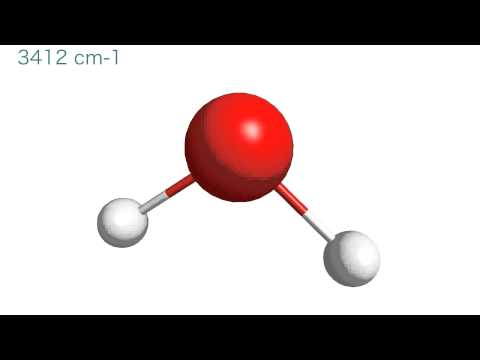

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('1uE2lvVkKW0', width=600, height=400,  playsinline=0)

Al graficar el índice de refracción notamos que la gráfica muestra dos oscilaciones de Lorentz. Usamos el módulo `nklib` de la librería `empylib` para graficar el índice de refracción del agua

In [7]:
%%capture showplot1
import numpy as np
import matplotlib.pyplot as plt
import empylib.nklib as nk

# Creamos el espectro
lam = np.linspace(0.1,10,1000)                          # espectro de longitudes de onda
N1   = nk.H2O(lam)                                      # índice de refracción
eps1 = N1**2                                            # constante dieléctrica

# Formateamos el lienzo para graficar
fig, ax = plt.subplots(1,2)                             # número de ejes en la figura
fig.set_size_inches(10, 3)                              # tamaño de la figura
plt.rcParams['font.size'] = '12'                        # tamaño de fuente

# Graficamos el resultado
ax[0].plot(lam,eps1.real,'b',label=r"$\varepsilon'$")   # constante dieléctrica (parte real)
ax[0].plot(lam,eps1.imag,'r',label=r"$\varepsilon''$")  # constante dieléctrica (parte imaginaria)
ax[1].plot(lam,N1.real,'b',label=r"$n$")                # índice de refracción (parte real)
ax[1].plot(lam,N1.imag,'r',label=r"$\kappa$")           # índice de refracción (parte imaginaria)

# Marcamos los valores máximos con una línea
for i in [280, 599]:
    ax[0].axvline(x = lam[i], color='k', ls='--', lw='1.0')
    ax[1].axvline(x = lam[i], color='k', ls='--', lw='1.0')
    ax[0].text(lam[i]*1.02,eps1[i].imag,r'%.3f $\mu$m'% lam[i], fontsize='10')

for i in [0,1]:
    ax[i].set_xlabel('Longitud de onda, $\lambda$ ($\mu$m)')
    ax[i].grid()
    ax[i].set_xlim(0.2,10)
    ax[i].legend(frameon=False)
ax[0].set_ylabel(r"Constante dielectrica, $\varepsilon = \varepsilon'+ \varepsilon''$")
ax[1].set_ylabel(r'Indice de refracción, $N = n + i\kappa$')
plt.show()

/home/panxopanza/miniconda3/lib/python3.11/site-packages/empylib/nklib/nklib.py:75: UserWarning: Extrapolating from 0.100 to 0.200
  warn('Extrapolating from %.3f to %.3f' % (lam[0], data[0,0]))


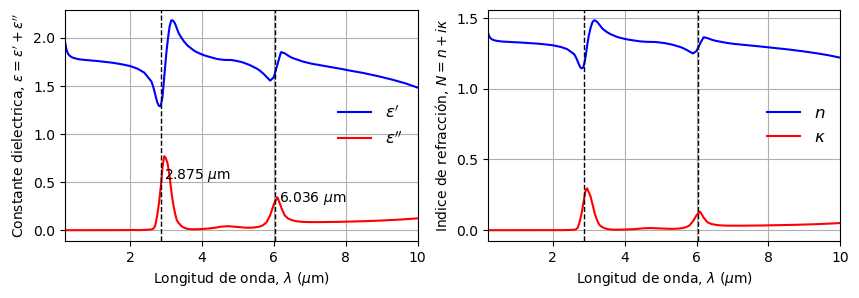

In [8]:
showplot1()

Notar que la resonancia en $\lambda =$ 2.98 $\mu$m (3351 cm$^{-1}$) no está presente en el espectro.

Este modo no es compatible con la oscilación de una onda electromagnética plana. Así la luz no interactúa con esta vibración y, por lo tanto, no se ve representada en el espectro del índice de refracción.

## Interacción de la luz con sólidos
El análisis anterior generalmente se aplica a gases, donde las moléculas no interactúan entre sí. En el caso de materiales sólidos, la interacción entre moléculas es fuerte, y genera bandas electrónicas de energía.

- **Banda de valencia**: corresponde a la banda ocupada por electrones con el mayor nivel de energía. En esta banda los electrones permanecen en un estado "ligado" al núcleo.

- **Banda de conducción**: corresponde a la banda no ocupada por electrones con el menor nivel de energía. En esta banda los electrones se mueven líbremente por el material

- **Banda prohibida (*band-gap*)**: Es la diferencia entre la banda de conducción y la banda de valencia

<img src="./images/bandas_electronicas.png" width="300px" align= center>

A partir de la separación entre la banda de conducción y la banda de valencia, podemos clasificar tres tipos de materiales en función de sus propiedades electrónicas:

<img src="./images/energy_bands_clasification.png" width="700px" align= center>

- **Conductor**, donde las bandas de conducción y valencia están traslapadas (bandgap = 0). En estos materiales, parte de los electrones están alojados en la banda de conducción y, por lo tanto, son capaces de conducir corriente eléctrica en presencia de un campo eléctrico.

- **Semiconductor**, donde las bandas de conducción y valencia están separadas. Sin embargo, la energía del bandgap es relativamente pequeña, de manera que un electrón puede ser llevado a la banda de conducción mediante un potencial eléctrico razonable, o mediante una onda electromagnética.

- **Aislante**, donde las bandas de conducción y valencia están muy separadas. El umbral para excitar un electrón a la banda de conducción es demaciado grande y, por lo tanto, el material no es capaz de conducir corriente.

La respuesta óptica de cada tipo de material está condicionada por sus propiedades electrónicas

### Aislantes (modelo de Lorentz)
Debido a que los electrones en un aislante están fuertemente ligados al núcleo, la respuesta óptica de este material está condicionada por los modos de vibración de la red atómica. Así, la constante dieléctrica y el indice de refración siguen un comportamiento similar al modelo de Lorentz.

Por ejemplo, el sílice (SiO$_2$)

<img src="./images/silica_fig.png" width="700px" align= center>

Tiene un índice de refracción donde podemos ver con claridad los modos de resonancia típicos del modelo de Lorentz

In [9]:
%%capture showplot1
import numpy as np
import matplotlib.pyplot as plt
import empylib.nklib as nk

lam = np.linspace(0.2,30,1000)                          # espectro de longitudes de onda
N1   = nk.SiO2(lam)                                     # índice de refracción
eps1 = N1**2                                            # constante dieléctrica

# formateamos el lienzo para graficar
fig, ax = plt.subplots(1,2)                             # número de ejes en la figura
fig.set_size_inches(10, 3)                              # tamaño de la figura
plt.rcParams['font.size'] = '10'                        # tamaño de fuente

# Graficamos el resultado
ax[0].plot(lam,eps1.real,'b',label=r"$\varepsilon'$")   # constante dieléctrica (parte real)
ax[0].plot(lam,eps1.imag,'r',label=r"$\varepsilon''$")  # constante dieléctrica (parte imaginaria)
ax[1].plot(lam,N1.real,'b',label=r"$n$")                # índice de refracción (parte real)
ax[1].plot(lam,N1.imag,'r',label=r"$\kappa$")           # índice de refracción (parte imaginaria)

for i in [0,1]:
    ax[i].set_xlabel('Longitud de onda, $\lambda$ ($\mu$m)')
    ax[i].grid()
    ax[i].legend(frameon=False)
ax[0].set_ylabel(r"Constante dielectrica, $\varepsilon = \varepsilon'+ \varepsilon''$")
ax[1].set_ylabel(r'Indice de refracción, $N = n + i\kappa$')
plt.show()

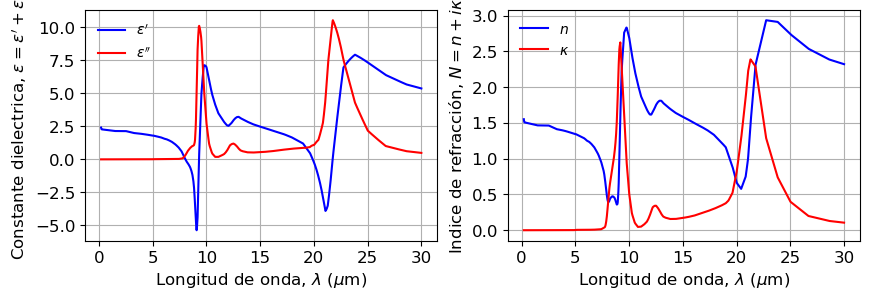

In [10]:
showplot1()

### Conductores (modelo de Drude)
En este caso los electrónes se mueven libremente por la red atómica.

Podemos representar la interacción de los electrones libres con una onda electromagnética utilizando la ecuación de movimiento. En este caso, no hay fuerza de restauración ($kx = 0$), y la ecuación es:

\begin{equation*}
m_e\ddot{x} + m_e\Gamma_e \dot{x} = eE_0 e^{-i\omega t},
\end{equation*}

donde $m_e$, $e$ y $\Gamma_e$ son, respectivamente, la masa, la carga elemental y la taza de decaimiento del electrón.

Mediante un procedimiento similar al utilzado para el modelo de Lorentz, derivamos el **modelo de Drude** para conductores:

\begin{equation}
\varepsilon = \varepsilon_\infty - \frac{\omega_p^2}{\omega^2 + i\Gamma_e \omega},\quad\mathrm{Modelo~de~Drude},
\end{equation}

donde $\omega_p^2 = \frac{N_ee^2}{\varepsilon_0 m}$ se conoce como frecuencia de plasma, y $N_e$ es la densidad de número de electrones. Similar al modelo de Lorentz, $\varepsilon_\infty$ representa la polarización neta del material.

Usaremos la función `drude` del módulo `empylib.nklib` para generar el índice de refracción y constante dielectrica a partir del modelo de Drude. *En el gráfico marcamos el equivalente a $\omega_p$ en longitud de onda $\lambda_p = 2\pi c_0/\omega_p$.*

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import empylib.nklib as nk
import empylib as em

def drude_model(epsinf,wp,gamma):
    lam = np.linspace(1E-3,5,1000)    # longitudes de onda

    # contruimos el modelo de Drude
    N1 = nk.drude(epsinf,wp,gamma,lam)     # índice de refra]cción
    eps1 = N1**2                           # constante dieléctrica

    # formateamos el lienzo para graficar
    fig, ax = plt.subplots(1,2)             # número de ejes en la figura
    fig.set_size_inches(10, 3)              # tamaño de la figura
    plt.rcParams['font.size'] = '10'        # tamaño de fuente

    # graficamos constante dielectrica e índice de refracción
    ax[0].plot(lam,eps1.real,'b',label=r"$\varepsilon'$")
    ax[0].plot(lam,eps1.imag,'r',label=r"$\varepsilon''$")
    ax[1].plot(lam,N1.real,'b',label=r"$n$")
    ax[1].plot(lam,N1.imag,'r',label=r"$\kappa$")
    
    # marcar línea de frecuencia natural
    lam_p = em.convert_units(wp,'eV','um')
    ax[0].axvline(x = lam_p, color='k', ls='--', lw='1.0')  
    ax[0].text(lam_p*1.1,-9,r'$\lambda_p =%.3f$ $\mu$m' % lam_p, fontsize='10', color='k')

    for i in [0,1]:
        ax[i].set_xlabel('Longitud de onda, $\lambda$ ($\mu$m)')
        ax[i].grid()
        ax[i].legend(frameon=False)
        ax[i].set_xlim(0,5.0)
    ax[0].set_ylabel(r"Constante dielectrica, $\varepsilon = \varepsilon'+ \varepsilon''$")
    ax[1].set_ylabel(r'Indice de refracción, $N = n + i\kappa$')
    ax[0].set_ylim(-10,10)
    ax[1].set_ylim(0,5)
    plt.show()

In [12]:
from ipywidgets import interact

@interact( epsinf=(1,5,0.1), 
           wp=(0.4,2.0,0.05), 
           gamma=(0.01,0.2,0.01))
def g(epsinf=1,wp=1.0, gamma=0.1):
    return drude_model(epsinf,wp,gamma)

interactive(children=(FloatSlider(value=1.0, description='epsinf', max=5.0, min=1.0), FloatSlider(value=1.0, d…

Notar que en modelo de Drude la condición $\varepsilon' < 0$ se manifiesta en el índice de refracción como $\kappa > n$. Esta condición se da cuando $\lambda_p \lesssim \lambda$

Cuando $\kappa > n$ la reflectividad aumenta significativamente. Esto explica la alta reflectividad en los conductores eléctricos

In [13]:
%%capture showplot3

import numpy as np
import matplotlib.pyplot as plt
from empylib.waveoptics import interface
import empylib as em
import empylib.nklib as nk

def drude_reflection(epsinf,wp,gamma):
    lam = np.linspace(1E-3,5,1000)    # longitudes de onda

    # contruimos el modelo de Drude
    n2 = nk.drude(epsinf,wp,gamma,lam)     # índice de refracción
    
    # índice de refracción aire
    n1 = np.ones(n2.shape)                    

    # Reflectividad en una interface entre un material de Drude y aire
    Rp = interface(0,n1,n2, pol='TM')[0] # TM
    Rs = interface(0,n1,n2, pol='TE')[0] # TE

    # formateamos el lienzo para graficar
    fig, ax = plt.subplots(1,2)             # número de ejes en la figura
    fig.set_size_inches(10, 3)              # tamaño de la figura
    plt.rcParams['font.size'] = '10'        # tamaño de fuente

    # graficamos constante dielectrica e índice de refracción
    ax[0].plot(lam,n2.real,'b',label=r"$n$")
    ax[0].plot(lam,n2.imag,'r',label=r"$\kappa$")
    ax[1].plot(lam,Rp, label='$R_\mathrm{TM}$', color='red', lw=3.0)
    ax[1].plot(lam,Rs, label='$R_\mathrm{TE}$', color='blue', lw=2.0, ls='--')
    
    
    # marcar línea de frecuencia natural
    lam_p = em.convert_units(wp,'eV','um')
    ax[0].axvline(x = lam_p, color='k', ls='--', lw='1.0')  
    ax[0].text(lam_p*1.1,4,r'$\lambda_p =%.3f$ $\mu$m' % lam_p, fontsize='10', color='k')

    for i in [0,1]:
        ax[i].set_xlabel('Longitud de onda, $\lambda$ ($\mu$m)')
        ax[i].grid()
        ax[i].legend(frameon=False)
        ax[i].set_xlim(0,5.0)
    ax[0].set_ylabel(r'Indice de refracción, $N = n + i\kappa$')
    ax[1].set_ylabel('Reflectividad')
    ax[0].set_ylim(0,5)
    ax[1].set_ylim(0,1.0)
    plt.show()

In [14]:
from ipywidgets import interact

@interact( epsinf=(1,5,0.1), 
           wp=(0.4,2.0,0.05), 
           gamma=(0.01,0.2,0.01))
def g(epsinf=1,wp=1.0, gamma=0.1):
    return drude_reflection(epsinf,wp,gamma)

interactive(children=(FloatSlider(value=1.0, description='epsinf', max=5.0, min=1.0), FloatSlider(value=1.0, d…

En general, los metales pueden ser bien representados por el modelo de Drude. En general, $\omega_p$ se ubica en el espectro UV y, por lo tanto, reflejan la luz visible (efecto espejo)

Por ejemplo, en el caso de aluminio $\omega_p = 15~\mathrm{eV}\approx 90~\mathrm{nm}$

In [15]:
%%capture showplot4
import numpy as np
import matplotlib.pyplot as plt
import empylib.nklib as nk

# índice de refracción y constante dielectrica aluminio
lam = np.linspace(0.01,1.0,1000)        # espectro de longitudes de onda (um)
N1 = nk.Al(lam)                         # índice de refracción
eps1 = N1**2                            # constante dieléctrica

# formateamos el lienzo para graficar
fig, ax = plt.subplots(1,2)             # número de ejes en la figura
fig.set_size_inches(10, 3)              # tamaño de la figura
plt.rcParams['font.size'] = '10'        # tamaño de fuente

# graficamos
ax[0].plot(lam,eps1.real,'b',label=r"$\varepsilon'$")
ax[0].plot(lam,eps1.imag,'r',label=r"$\varepsilon''$")
ax[1].plot(lam,N1.real,'b',label=r"$n$")
ax[1].plot(lam,N1.imag,'r',label=r"$\kappa$")

# formateamos los ejes
for i in [0,1]:
    ax[i].set_xlabel('Longitud de onda, $\lambda$ ($\mu$m)')
    ax[i].grid()
    ax[i].set_xlim(0.01,1.0)
    ax[i].legend(frameon=False)
ax[0].set_ylabel(r"Constante dielectrica, $\varepsilon = \varepsilon'+ \varepsilon''$")
ax[1].set_ylabel(r'Indice de refracción, $N = n + i\kappa$')
plt.show()

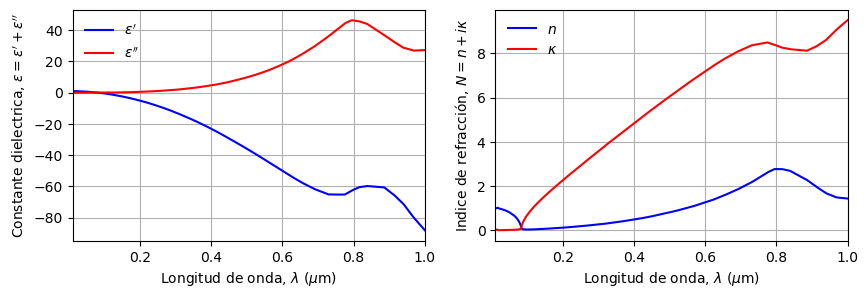

In [16]:
showplot4()

Notemos como para $\lambda \approx 0.8$ $\mu$m, la respuesta del material se desvía del modelo de Drude. Esta respuesta esta asociada a un modo de vibración (modelo de Lorentz).

### Semiconductores (absorción interbanda)

En este caso las interacciones con ondas electromagnéticas están dictadas por bandas de absorción asociadas a la excitación de electrones de valencia a la banda de conducción. 

Este fenómeno se conoce como **absorpción interbanda**, y ocurre cuando la energía del fotón $\hbar\omega$ ($\hbar = 6.58\times 10^16$ eV$\cdot$s) es superior al bandgap del material.

<img src="./images/photoexcited_electrons.png" width="400px" align= center>

Los semiconductores son los materiales fundamentales en transistores, LED y celdas fotovoltaicas. El semiconductor más conocido es el silicio (Si).

<img src="./images/silicon_fig.png" width="800px" align= center>

El índice de refracción del silicio es:

<img src="./images/si_nk.png" width="700px" align= center>

En general, los materiales pueden presentar más de un tipo de respuesta.

Por ejemplo, el oro tiene absorción interbanda en longitudes de onda $\lambda < 0.5$ $\mu$m, combinado con el modelo de Drude.
<img src="./images/gold_nk.png" width="800px" align= center>

Debido a esta respuesta, el oro absorbe las longitudes de onda correspondientes al azul y violeta, y refleja el resto de los colores.

La siguiente figura muestra el color del oro según el ángulo de incidencia en base al espectro de reflexión de una interface aire/oro.

In [17]:
%%capture showplot5
import numpy as np
import matplotlib.pyplot as plt
from empylib.waveoptics import interface
from empylib.ref_spectra import AM15
from empylib.ref_spectra import color_system as cs
cs = cs.hdtv

# creamos índices de refracción
lam = np.linspace(0.3,0.8,81)   # espectro de longitudes de onda (en um)
n2 = nk.gold(lam)               # índice de refracción oro
n1 = np.ones(n2.shape)          # índice de refracción aire

# Reflectividad en interface función del ángulo "tt"
Rp = lambda tt : interface(tt, n1,n2, pol='TM')[0]
Rs = lambda tt : interface(tt, n1,n2, pol='TE')[0]

# formateamos la figura
fig, ax = plt.subplots()                # número de ejes en la figura
fig.set_size_inches(6, 3)               # tamaño de la figura
plt.rcParams['font.size'] = '12'        # tamaño de fuente        

# graficamos el color reflejado según el ángulo de incidencia
theta = np.linspace(0,90,100)           # angulo de incidencia
for i in range(len(theta)): 
    R = 0.5*Rp(np.radians(theta[i])) + 0.5*Rs(np.radians(theta[i]))
    Irad = R*AM15(lam)
    html_rgb = cs.spec_to_rgb(Irad, lam, out_fmt='html')
    ax.axvline(theta[i], color=html_rgb, linewidth=6) 
ax.set_xlim([min(theta),max(theta)])
ax.set_ylim([0,1.0])
ax.axes.yaxis.set_visible(False)
ax.set_xlabel('Ángulo de incidencia (deg)')
plt.show()

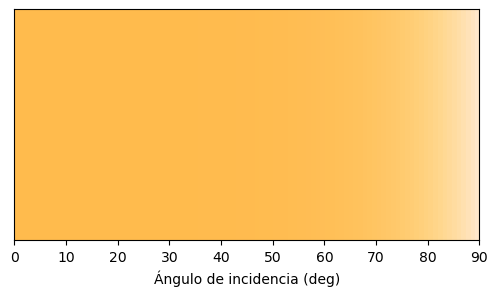

In [18]:
showplot5()

Otro ejemplo es el dioxido de titanio (TiO$_2$), el cual presenta absorción interbanda en el espectro ultravioleta, y oscilaciones de Lorentz en el infrarojo.

<img src="./images/tio2_nk.png" width="700px" align= center>

Debido a la absorcion UV, TiO$_2$ es muy utilizado en cremas para protección solar.

<img src="./images/tio2_fig.png" width="800px" align= center>

## Referencias
- Rao S. S. **Chapter 4 - Vibration Under General Forcing Conditions** in *Mechanical Vibrations*, 6th Ed, Pearson, 2018

- Griffths D., **Chapter 4.1 - Polarization** in *Introduction to Electrodynamics*, 4th Ed, Pearson, 2013

- Simmons J. and Potter K., **Chapter 2 and 3** in *Optical Materials*, 1st Ed, Academic Press, 2000